In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('/content/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## 1. Data Understanding

In [ ]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
df['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [ ]:
df['destination_city'].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [ ]:
df['arrival_time'].value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


## 2. Data Preprocessing

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [ ]:
df.duplicated().sum()

0

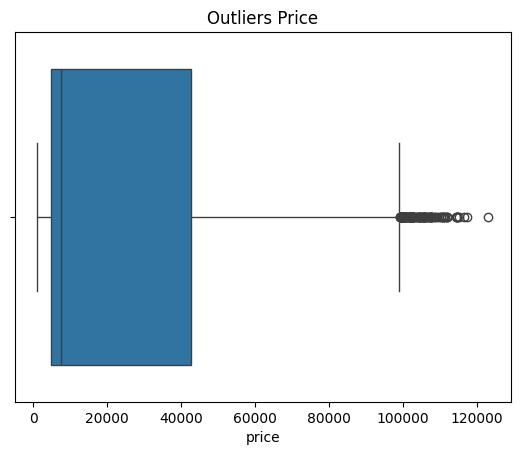

In [ ]:
import seaborn as sns

sns.boxplot(x=df['price'])
plt.title('Outliers Price')
plt.show()

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("Data sebelum menghapus outliers:", len(df))
print("Data setelah menghapus outliers:", len(df_cleaned))

Data sebelum menghapus outliers: 300153
Data setelah menghapus outliers: 300030


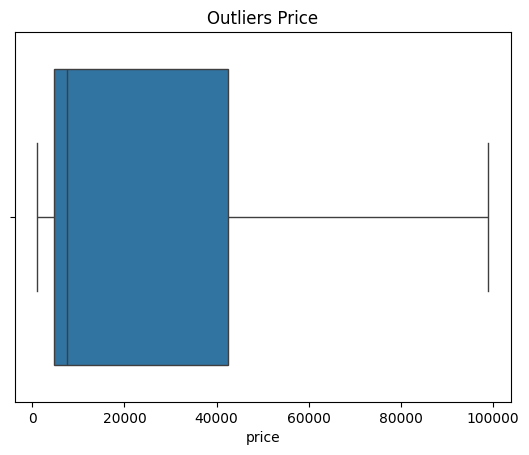

In [ ]:
sns.boxplot(x=df_cleaned['price'])
plt.title('Outliers Price')
plt.show()

In [ ]:
selected_columns = ['airline', 'flight', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class', 'price']
df_cleaned = df_cleaned[selected_columns]
df_cleaned.head()

,airline,flight,source_city,departure_time,arrival_time,destination_city,class,price
0,SpiceJet,SG-8709,Delhi,Evening,Night,Mumbai,Economy,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,Morning,Mumbai,Economy,5953
2,AirAsia,I5-764,Delhi,Early_Morning,Early_Morning,Mumbai,Economy,5956
3,Vistara,UK-995,Delhi,Morning,Afternoon,Mumbai,Economy,5955
4,Vistara,UK-963,Delhi,Morning,Morning,Mumbai,Economy,5955


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_cleaned['airline'] = label_encoder.fit_transform(df_cleaned['airline'])
df_cleaned['flight'] = label_encoder.fit_transform(df_cleaned['flight'])
df_cleaned['source_city'] = label_encoder.fit_transform(df_cleaned['source_city'])
df_cleaned['departure_time'] = label_encoder.fit_transform(df_cleaned['departure_time'])
df_cleaned['arrival_time'] = label_encoder.fit_transform(df_cleaned['arrival_time'])
df_cleaned['destination_city'] = label_encoder.fit_transform(df_cleaned['destination_city'])
df_cleaned['class'] = label_encoder.fit_transform(df_cleaned['class'])

In [ ]:
df_cleaned.head()

,airline,flight,source_city,departure_time,arrival_time,destination_city,class,price
0,4,1408,2,2,5,5,1,5953
1,4,1387,2,1,4,5,1,5953
2,0,1213,2,1,1,5,1,5956
3,5,1559,2,4,0,5,1,5955
4,5,1549,2,4,4,5,1,5955


## 3. Data Visualization

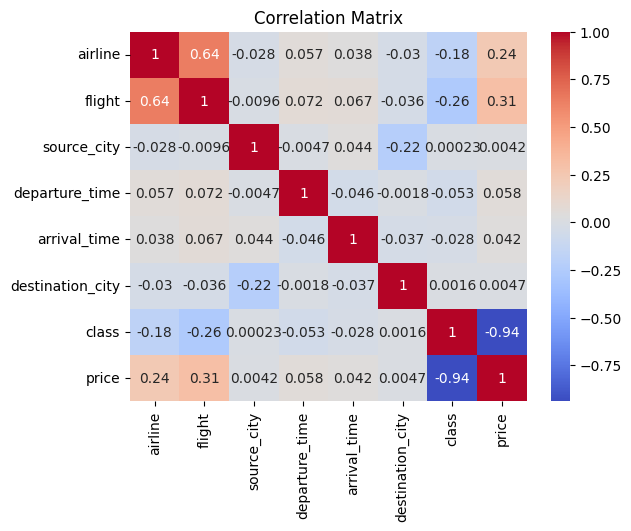

In [ ]:
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-39-ad9d858f1260>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='airline', order=df_cleaned['airline'].value_counts().index, palette='viridis')


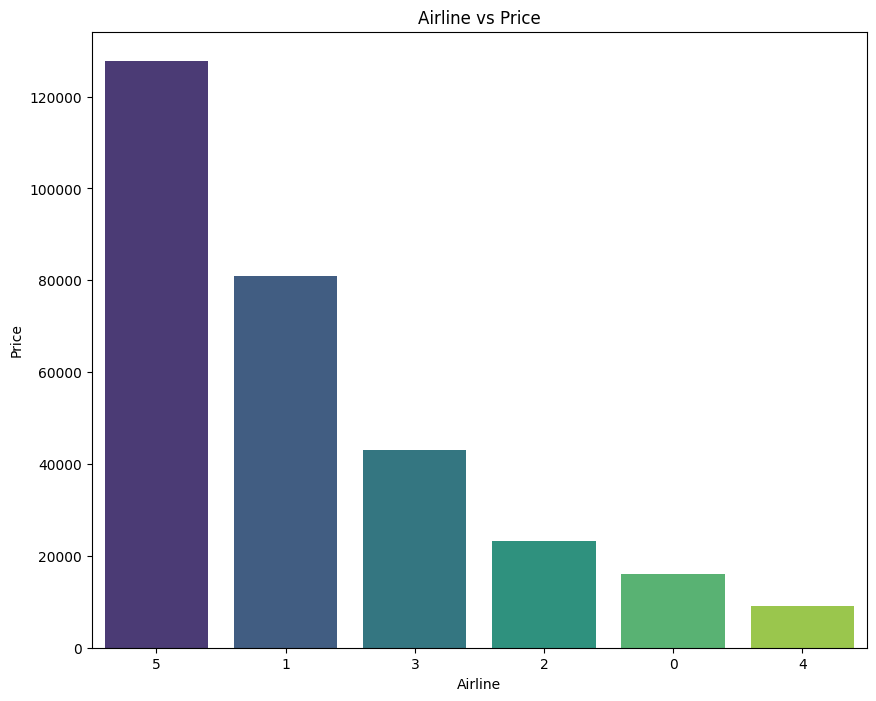

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_cleaned, x='airline', order=df_cleaned['airline'].value_counts().index, palette='viridis')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Airline vs Price')
plt.show()

<ipython-input-41-7ae70682d440>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='class', order=df_cleaned['class'].value_counts().index, palette='bright')


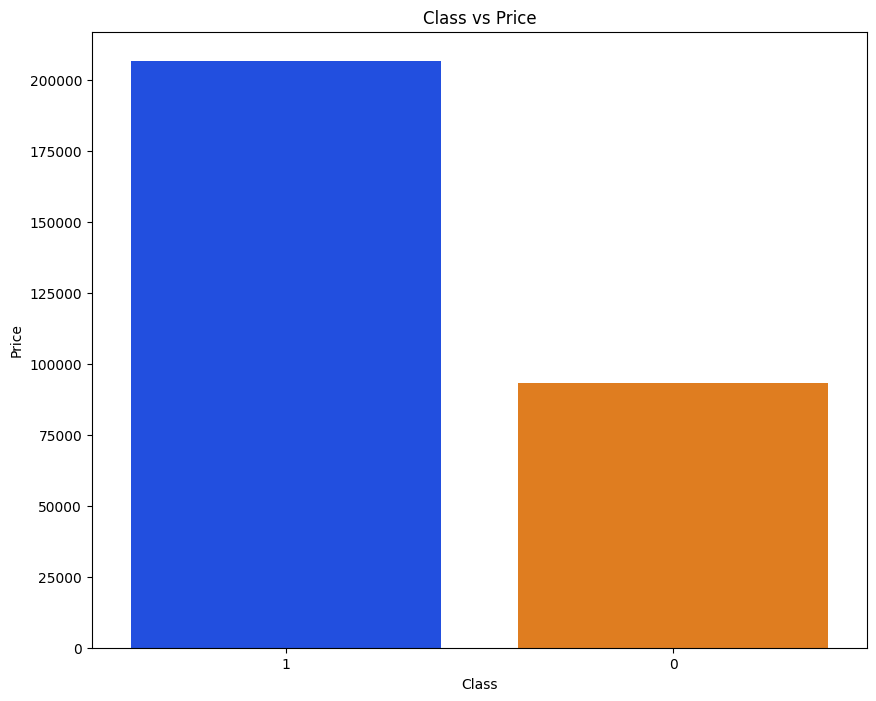

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_cleaned, x='class', order=df_cleaned['class'].value_counts().index, palette='bright')
plt.xlabel('Class')
plt.ylabel('Price')
plt.title('Class vs Price')
plt.show()

## 4. Data Preparation

In [ ]:
X = df_cleaned.iloc[:, :-1].values
y = df_cleaned.iloc[:, -1].values
print('Data X = ', X.shape)
print('Data y = ', y.shape)

Data X =  (300030, 7)
Data y =  (300030,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
pred = rf.predict(X_test)

In [ ]:
score = rf.score(X_test, y_test)
print('Score = ', score)

Score =  0.97282757206659


In [ ]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  2320.4823483078258
MSE:  13863390.472573943
RMSE:  3723.3574193963627


## 5. Data Testing

In [ ]:
df_cleaned.head()

,airline,flight,source_city,departure_time,arrival_time,destination_city,class,price
0,4,1408,2,2,5,5,1,5953
1,4,1387,2,1,4,5,1,5953
2,0,1213,2,1,1,5,1,5956
3,5,1559,2,4,0,5,1,5955
4,5,1549,2,4,4,5,1,5955


In [ ]:
df['destination_city'].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [ ]:
df_cleaned['destination_city'].value_counts()

,count
destination_city,
5,59067
2,57339
0,51042
4,49511
3,42716
1,40355


In [ ]:
testing = {
    'airline': [0],
    'flight' : [1559],
    'source_city' : [0],
    'departure_time' : [1],
    'arrival_time' : [4],
    'destination_city' : [2],
    'class' : [1]
}

df_testing = pd.DataFrame(testing)
df_testing

,airline,flight,source_city,departure_time,arrival_time,destination_city,class
0,0,1559,0,1,4,2,1


In [ ]:
df_testing = rf.predict(df_testing)
df_testing

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([4161.1199952])